# The probability of choosing both hands depends on an interaction between motor capacity and limb-specific control in chronic stroke
### *Rini Varghese, Jason J Kutch, Nicolas Schweighofer, Carolee J Winstein*
#### *Division of Biokinesiology and Physical Therapy, University of Southern California* <br>
A goal of rehabilitation after stroke is to promote pre-stroke levels of arm use for everyday, frequently bimanual, functional activities. We reasoned that, after a stroke, the choice to use one or both hands for bimanual tasks might depend not only on residual motor capacity but also the specialized demands imposed by the task on the paretic hand. To capture spontaneous, task-specific choices, we covertly observed 50 pre-stroke right-handed chronic stroke survivors (25 left hemisphere damage, LHD) and recorded their hand use strategies for two pairs of bimanual tasks with distinct demands: one with greater precision requirements (photo-album tasks), and another with greater stabilization requirements (letter-envelope tasks). The primary outcome was the choice to use one or both hands. Logistic regression was used to test the hypothesis that the probability of choosing a bimanual strategy would be greater in those with less severe motor impairment and those with LHD. When collapsed across the four subtasks, we found support for this hypothesis. However, notably, the influence of these factors on bimanual choice varied based on task demands. For the photo-album task, the probability of a bimanual strategy was greater for those with LHD compared to RHD, regardless of the degree of motor impairment. For the letter-envelope task, we found a significant interaction between impairment and side of lesion in determining the likelihood of choosing both hands. Therefore, the manner in which side of lesion moderates the effect of impairment on hand use depends on the task.     

In [37]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

## Table of Contents

* **[Step 0: Loading Data & Packages](#section1)**<br>

* **[Step 1: Descriptive Statistics](#section2)**<br>
    * [Summarizing the Independent Variables](#section2a)<br>
    * [Summarizing the Dependent Variables](#section2b)<br>
    
* **[Step 2: Calculating Unadjusted Odds Ratio](#section3)**<br>

* **[Step 3: Primary analysis of *Strategy* (Logistic Regression)](#section4)**<br>
    * [Checking Assumptions](#section4a)<br>
    * [Model Comparisons](#section4b)<br> 
    * [Model Performance](#section4c)<br>
    * [Post-Hoc Task-Wise Comparisons](#secontion4d)<br>
    
* **[Step 4: Secondary analysis of *Movement time* (Linear Regression)](#section5)**<br>


***
<a id='section0'></a>
## <font color = 'grey'> Review of Methods </font>

We defined and discretized four bimanual task goals from the full set *(Figure below)*: <br>
<font color = 'black'>    <img src="tasks_comb.png" style="width: 300px;" align="right"/>
 1. receiving a heavy photo album (pah) <br> 
 2. placing a photo into an album sleeve (pa) <br>
 3. folding a letter (standard trifold) (lef) <br>
 4. placing the letter into the envelope (le) <br>
 
The primary outcome we quantified was the overall motor strategy, which described if one (unimanual, = 0) or both hands (bimanual, = 1) were used to accomplish the task goal. In addition to this primary measure, we quantified task duration. To do this, we implemented a pre-defined discretization, in which we set time-points to mark the start and end of each task. Table 1 provides task-wise definitions for time points used in the discretization process. <br>

**Table 1: Start (onset) and end (offset) time points for each of the 4 bimanual tasks.**


In [38]:
library(IRdisplay); library(huxtable)
task.table = hux(
    
         Task = c("Photo-Album Task",
                  "Photo-Album Task",
                  "Letter-Envelope Task",
                  "Letter-Envelope Task"),
    
         Subtask = c("Receive photo album",
                  "Place photo in album sleeve",
                  "Fold letter",
                  "Insert letter into envelope"),
    
         Onset = c("Initial contact with the photo album",
                   "Initial contact with photo or both sleeve & photo",
                   "Initial contact with the letter any one hand",
                   "Initial contact with envelope or letter"),
    
         Offset = c("Album placed on the table surface",
                    "Photo is completely inserted into sleeve",
                    "Final (2nd) crease has been folded",
                    "Letter is completely inserted"),
    
         add_colnames = FALSE, add_rownames = FALSE
    
         )

task.table


Task,Subtask,Onset,Offset
Photo-Album Task,Receive photo album,Initial contact with the photo album,Album placed on the table surface
Photo-Album Task,Place photo in album sleeve,Initial contact with photo or both sleeve & photo,Photo is completely inserted into sleeve
Letter-Envelope Task,Fold letter,Initial contact with the letter any one hand,Final (2nd) crease has been folded
Letter-Envelope Task,Insert letter into envelope,Initial contact with envelope or letter,Letter is completely inserted


*Note:*
* First full/successful attempt was assessed.
* For symmetric tasks, a strategy was considered bimanual even if the paretic arm provided gross assist.

**List of Abbreviations:**<br>
 1.  **LET**:   *Letter-Envelope Task Pair*
 2.  **PAT**:   *Photo-Album Task Pair*<br><br>
 3.  **PAH**:   *Receiving the photo album*
 4.  **PA**:    *Inserting photo into album sleeve*
 5.  **LEF**:   *Folding the letter*
 6.  **LE**:    *Inserting letter into the envelope*<br><br>
 7.  **SoL**:   *Side of Lesion*
 8.  **LHD**:   *Left Hemisphere Damage*
 9.  **RHD**:   *Right Hemisphere Damage*
 10.  **UEFM**: *Upper Extremity Fugl-Meyer Score*
 11. **Chron**: *Chronicity*<br><br>
 12.  **UM**:    *Unimanual*
 13. **BM**:    *Bimanual*
 14. **MT**:    *Movement Time*

<font color = 'black'>

***
<a id='section1'></a>
# <font color = 'grey'>Step 0: Loading Data & Packages </font> 

In [26]:
rm(list=ls())
ReqdLibs = c("repr","ggplot2","IRdisplay","lme4","GGally","pixiedust","patchwork",
             "htmltools","huxtable","sjPlot","broom","sjstats","cowplot","see","ggpubr","dplyr","DT")
invisible(lapply(ReqdLibs, library, character.only = TRUE))
dir = getwd()
setwd(dir)
aaut2 = read.csv("bmAAUT_data.csv")
aaut3 = subset(aaut2,stroke=="stroke")
suppressMessages(attach(aaut3))

# Load the function for multiple sub-plots in ggplot
source('multiplot.R')

display_html('Data and necessary packages have been loaded.')



Data and necessary packages have been loaded.

In [33]:
aaut3
#datatable(aaut3[c(-6,-10,-13)])

,Subj,sex,stroke,sol,task.type,task,age,chron,uefm,Bimanual,strategy,mt,cl.prefRole
1,5,male,stroke,LHD,Letter-Envelope Tasks,le,64.82,39.19,47,1,bm,9.809810,no
2,12,male,stroke,LHD,Letter-Envelope Tasks,le,46.09,30.02,29,1,bm,6.306306,no
3,13,male,stroke,LHD,Letter-Envelope Tasks,le,80.54,37.35,50,1,bm,14.914915,no
4,17,female,stroke,LHD,Letter-Envelope Tasks,le,56.72,84.95,30,1,bm,18.800000,no
5,18,male,stroke,LHD,Letter-Envelope Tasks,le,48.90,57.07,37,1,bm,11.160000,no
6,24,female,stroke,LHD,Letter-Envelope Tasks,le,62.59,90.48,54,1,bm,9.000000,no
7,1,male,stroke,LHD,Letter-Envelope Tasks,le,68.12,87.06,26,1,bm,7.507508,yes
8,2,male,stroke,LHD,Letter-Envelope Tasks,le,64.56,44.05,34,0,um,19.586253,yes
9,4,male,stroke,LHD,Letter-Envelope Tasks,le,43.15,44.09,49,1,bm,23.056390,yes
10,6,male,stroke,LHD,Letter-Envelope Tasks,le,66.92,111.52,51,1,bm,8.942276,yes


In [29]:
levels(aaut3$task.type) <- c("Letter-Envelope Tasks","Photo-Album Tasks")
levels(aaut3$sol) <- c("Ctr","LHD","RHD")

thm = theme(axis.text=element_text(size=16,face="bold"),
      axis.title=element_text(size=16,face="bold"),
      strip.text.x=element_text(size=16,face="bold"),
      strip.text.y=element_text(size=16,face="bold"),
      legend.text=element_text(size=16,face="bold"),
      legend.title=element_text(size=16,face="bold"),
      plot.title = element_text(size = 20, face = "bold"))

*****
<a id='section2'></a>
# <font color = 'grey'>Step 1: Descriptive Statistics </font> 

<a id='section2a'></a>
## 1.1. Summarizing Independent Variables
### 1.1.a. Full Sample

In [42]:
j = c(1,3,5,10:12) # columns for which summary is not wanted
as_hux(summary(aaut2[1:61,-j]),add_rownames = FALSE,add_colnames = FALSE)

,sex,sol,task,age,chron,uefm,cl.prefRole
X,female:24,ctr:11,le :61,Min. :35.48,Min. : 26.33,Min. :19.00,Min. :0.0000
X.1,male :37,lhd:25,lef: 0,1st Qu.:51.00,1st Qu.: 44.62,1st Qu.:35.25,1st Qu.:1.0000
X.2,NA,rhd:25,pa : 0,Median :61.04,Median : 66.05,Median :45.00,Median :1.0000
X.3,NA,NA,pah: 0,Mean :60.21,Mean : 69.87,Mean :42.68,Mean :0.8909
X.4,NA,NA,NA,3rd Qu.:67.00,3rd Qu.: 79.38,3rd Qu.:50.75,3rd Qu.:1.0000
X.5,NA,NA,NA,Max. :92.00,Max. :212.52,Max. :63.00,Max. :1.0000
X.6,NA,NA,NA,NA,NA's :11,NA's :11,NA's :6


### 1.1.b. Summary by Group
* ***Non-Disabled Control Adults***

In [43]:
ctrlOnly = subset(aaut2[51:61,-j],sol=="ctr")
as_hux(summary(ctrlOnly),add_rownames = FALSE,add_colnames = FALSE)
# sd(ctrlOnly$age)

,sex,sol,task,age,chron,uefm,cl.prefRole
X,female:7,ctr:11,le :11,Min. :51.00,Min. : NA,Min. : NA,Min. :1
X.1,male :4,lhd: 0,lef: 0,1st Qu.:55.50,1st Qu.: NA,1st Qu.: NA,1st Qu.:1
X.2,NA,rhd: 0,pa : 0,Median :63.00,Median : NA,Median : NA,Median :1
X.3,NA,NA,pah: 0,Mean :62.55,Mean :NaN,Mean :NaN,Mean :1
X.4,NA,NA,NA,3rd Qu.:64.50,3rd Qu.: NA,3rd Qu.: NA,3rd Qu.:1
X.5,NA,NA,NA,Max. :92.00,Max. : NA,Max. : NA,Max. :1
X.6,NA,NA,NA,NA,NA's :11,NA's :11,NA


In [44]:
display_markdown("* ***All Stroke***")
strokeOnly = subset(aaut2[1:50,-j],stroke=="stroke")
as_hux(summary(strokeOnly),add_rownames = FALSE,add_colnames = FALSE)
#sd(na.omit(strokeOnly$age))


* ***All Stroke***

,sex,sol,task,age,chron,uefm,cl.prefRole
X,female: 17,ctr : 0,le : 50,Min. :35.48,Min. : 26.33,Min. :19.00,Min. :0.0000
X.1,male : 33,lhd : 25,lef : 0,1st Qu.:50.47,1st Qu.: 44.62,1st Qu.:35.25,1st Qu.:1.0000
X.2,NA's :150,rhd : 25,pa : 0,Median :60.52,Median : 66.05,Median :45.00,Median :1.0000
X.3,NA,NA's:150,pah : 0,Mean :59.70,Mean : 69.87,Mean :42.68,Mean :0.8636
X.4,NA,NA,NA's:150,3rd Qu.:67.75,3rd Qu.: 79.38,3rd Qu.:50.75,3rd Qu.:1.0000
X.5,NA,NA,NA,Max. :80.54,Max. :212.52,Max. :63.00,Max. :1.0000
X.6,NA,NA,NA,NA's :150,NA's :150,NA's :150,NA's :156


In [45]:
display_markdown("* ***Left Hemisphere Damage (LHD)***")
lhdOnly = subset(aaut2[1:50,-j],sol=="lhd")
as_hux(summary(lhdOnly),add_rownames = FALSE,add_colnames = FALSE)
#sd(lhdOnly$.)

* ***Left Hemisphere Damage (LHD)***

,sex,sol,task,age,chron,uefm,cl.prefRole
X,female: 9,ctr: 0,le :25,Min. :43.15,Min. : 30.02,Min. :19.0,Min. :0.0000
X.1,male :16,lhd:25,lef: 0,1st Qu.:53.00,1st Qu.: 44.09,1st Qu.:30.0,1st Qu.:0.2500
X.2,NA,rhd: 0,pa : 0,Median :60.00,Median : 63.48,Median :47.0,Median :1.0000
X.3,NA,NA,pah: 0,Mean :61.00,Mean : 64.99,Mean :42.2,Mean :0.7273
X.4,NA,NA,NA,3rd Qu.:66.92,3rd Qu.: 84.00,3rd Qu.:51.0,3rd Qu.:1.0000
X.5,NA,NA,NA,Max. :80.54,Max. :111.52,Max. :63.0,Max. :1.0000
X.6,NA,NA,NA,NA,NA,NA,NA's :3


In [46]:
display_markdown("* ***Right Hemisphere Damage (RHD)***")
rhdOnly = subset(aaut2[1:50,-j],sol=="rhd")
as_hux(summary(rhdOnly),add_rownames = FALSE,add_colnames = FALSE)
#sd(rhdOnly$age)

* ***Right Hemisphere Damage (RHD)***

,sex,sol,task,age,chron,uefm,cl.prefRole
X,female: 8,ctr: 0,le :25,Min. :35.48,Min. : 26.33,Min. :28.00,Min. :1
X.1,male :17,lhd: 0,lef: 0,1st Qu.:50.10,1st Qu.: 46.22,1st Qu.:37.00,1st Qu.:1
X.2,NA,rhd:25,pa : 0,Median :61.04,Median : 66.21,Median :44.00,Median :1
X.3,NA,NA,pah: 0,Mean :58.40,Mean : 74.74,Mean :43.16,Mean :1
X.4,NA,NA,NA,3rd Qu.:71.34,3rd Qu.: 77.98,3rd Qu.:49.00,3rd Qu.:1
X.5,NA,NA,NA,Max. :77.28,Max. :212.52,Max. :55.00,Max. :1
X.6,NA,NA,NA,NA,NA,NA,NA's :3


### 1.1. c. Comparisons between LHD and RHD

* ***Visualizing Group-Wise Independent Variables***

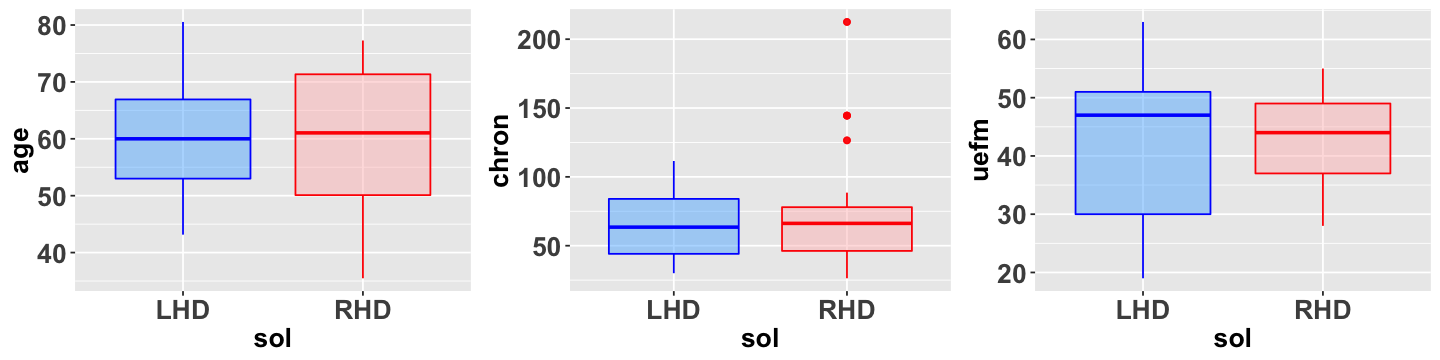

In [47]:
display_markdown("* ***Visualizing Group-Wise Independent Variables***")

#Figure
g1 = ggplot(aes(y = age, x = sol,col=sol,fill=sol), data = aaut3) + geom_boxplot(alpha=0.5, show.legend = FALSE) +
    scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) +
    scale_fill_manual(values=c("steelblue1","rosybrown1")) + thm
g2 = ggplot(aes(y = chron, x = sol,col=sol,fill=sol,alpha=0.5), data = aaut3) + geom_boxplot(alpha=0.5,show.legend = FALSE) +
    scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + 
    scale_fill_manual(values=c("steelblue1","rosybrown1")) + thm
g3 = ggplot(aes(y = uefm, x = sol,col=sol,fill=sol,alpha=0.5), data = aaut3) + geom_boxplot(alpha=0.5,show.legend = FALSE) +
    scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + 
    scale_fill_manual(values=c("steelblue1","rosybrown1")) + thm

options(repr.plot.width=12, repr.plot.height=3)
multiplot(g1,g2,g3,cols=3)


In [48]:
display_markdown('*Comparing ***UEFM*** between LHD and RHD*')
rev(tidy(t.test(uefm[sol=="lhd"],uefm[sol=="rhd"])))
display_markdown('*Comparing ***Age*** between LHD and RHD*')
rev(tidy(t.test(age[sol=="lhd"],age[sol=="rhd"])))
display_markdown('*Comparing ***Chronicity*** between LHD and RHD*')
rev(tidy(wilcox.test(chron[sol=="lhd"],chron[sol=="rhd"])))
display_markdown('*Comparing ***Sex*** between LHD and RHD*')
rev(tidy(chisq.test(sex[sol=="lhd"],sex[sol=="rhd"])))

*Comparing ***UEFM*** between LHD and RHD*

alternative,method,conf.high,conf.low,parameter,p.value,statistic,estimate2,estimate1,estimate
two.sided,Welch Two Sample t-test,1.901681,-3.821681,165.5805,0.5086713,-0.6623444,43.16,42.2,-0.96


*Comparing ***Age*** between LHD and RHD*

alternative,method,conf.high,conf.low,parameter,p.value,statistic,estimate2,estimate1,estimate
two.sided,Welch Two Sample t-test,5.797464,-0.6054635,188.8687,0.1113714,1.599543,58.4,60.996,2.596


*Comparing ***Chronicity*** between LHD and RHD*

alternative,method,p.value,statistic
two.sided,Wilcoxon rank sum test with continuity correction,0.5195453,4736


*Comparing ***Sex*** between LHD and RHD*

method,parameter,p.value,statistic
Pearson's Chi-squared test with Yates' continuity correction,1,0.6616192,0.1915626


### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> 
Of the total 50 participants, 33 (66%) were male. There were equal numbers of LHD and RHD. The average age was 59.7 years, average chronicity was 5.4 years post-stroke, and average score on the UEFM was 42.2. Individuals with RHD were on average slightly more chronic compared to those with LHD (difference of about 10 months), however, as we see in the Figure above, this may have been an effect of a small number of individuals. Thus, median chronicity was much more comparable between the two groups (approx. 63.5 in LHD vs 66 in RHD). <br><br>
**Overall, there were no significant differences between the two groups w.r.t. age, chronicity or UEFM scores.**

<a id='section2b'></a>
## 1.2. Summarizing Dependent Variables
### 1.2.a. Full Sample

,strategy,mt
X,bm:131,Min. : 0.8979
X.1,um: 69,1st Qu.: 3.3018
X.2,NA,Median : 8.3433
X.3,NA,Mean :10.9478
X.4,NA,3rd Qu.:16.0744
X.5,NA,Max. :39.8065


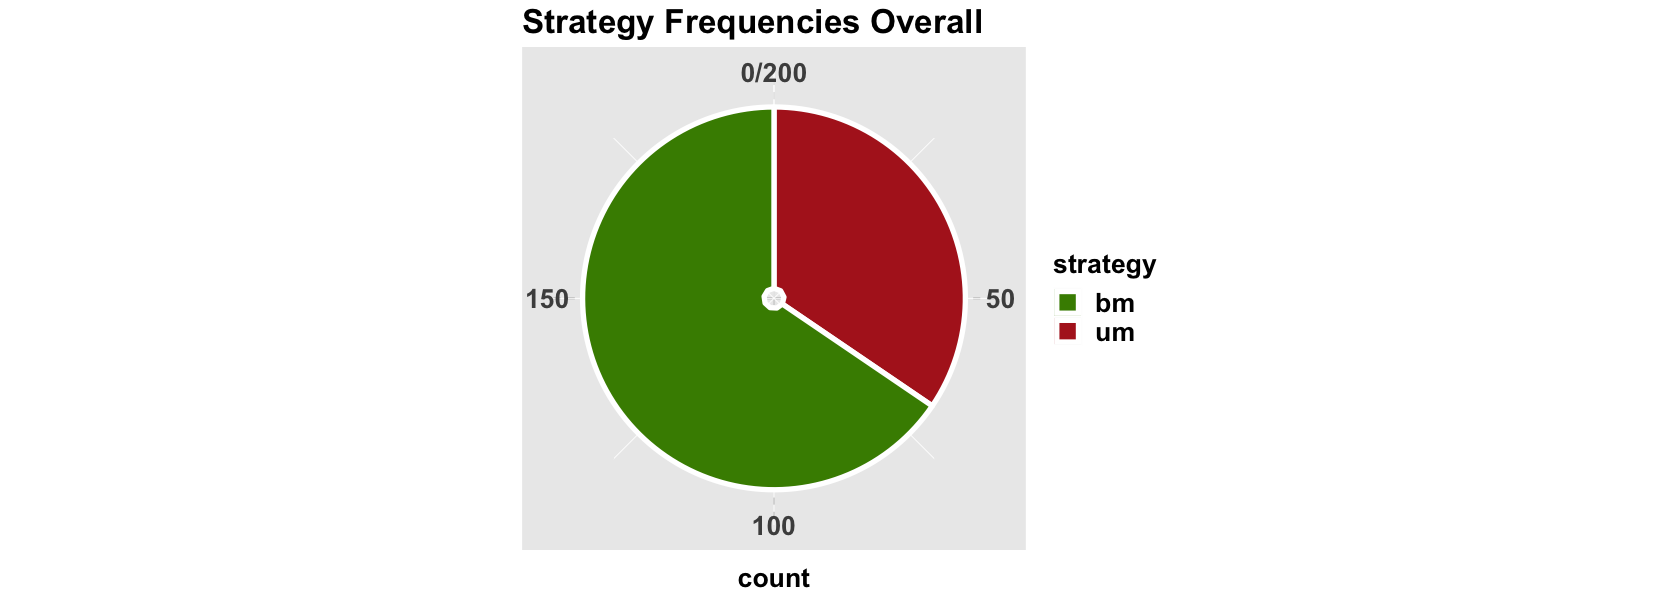

In [49]:
# tabulated summaries of strategy and movement times
as_hux(summary(aaut3[,11:12]),add_rownames =  FALSE,add_colnames = FALSE)


# pie charts showing overall strategy frequencies by group
options(repr.plot.width=14, repr.plot.height=5)

ggplot(subset(aaut3,stroke=="stroke"), aes(x = "",fill = strategy)) +
geom_bar(width = 0) + coord_polar(theta = "y") +
    scale_fill_manual(values = c("um" = "firebrick", "bm" = "chartreuse4")) + theme_cleveland() + 
    geom_bar(size = 1.5, colour = "white") + thm + ggtitle("Strategy Frequencies Overall")

### 1.2.b. Summary by Group (i.e., Side of Stroke Lesion)

,strategy,mt
X,bm:131,Min. : 0.8979
X.1,um: 69,1st Qu.: 3.3018
X.2,NA,Median : 8.3433
X.3,NA,Mean :10.9478
X.4,NA,3rd Qu.:16.0744
X.5,NA,Max. :39.8065


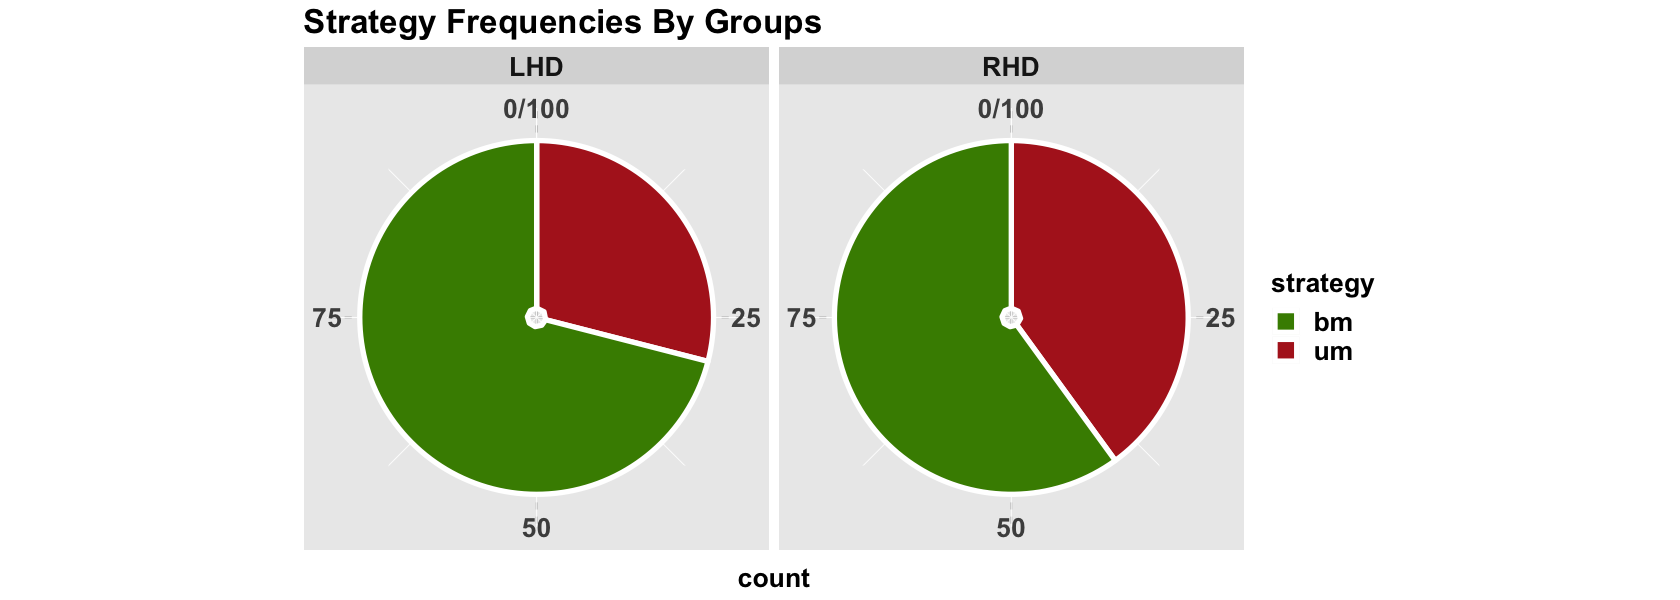

In [50]:
# tabulated summaries of strategy and movement times
as_hux(summary(aaut3[,11:12]),add_rownames =  FALSE,add_colnames = FALSE)


# pie charts showing overall strategy frequencies by group
options(repr.plot.width=14, repr.plot.height=5)

ggplot(subset(aaut3,stroke=="stroke"), aes(x = "",fill = strategy)) +
geom_bar(width = 0) + coord_polar(theta = "y") + facet_grid(~sol) + 
    scale_fill_manual(values = c("um" = "firebrick", "bm" = "chartreuse4")) + theme_cleveland() + 
    geom_bar(size = 1.5, colour = "white") + thm + ggtitle("Strategy Frequencies By Groups")

### 1.2.c. Summary by Task 
**(i.e., Letter-Envelope Task Pair vs Photo-Album Task Pair)**

,bm,um
let,83,17
pat,48,52


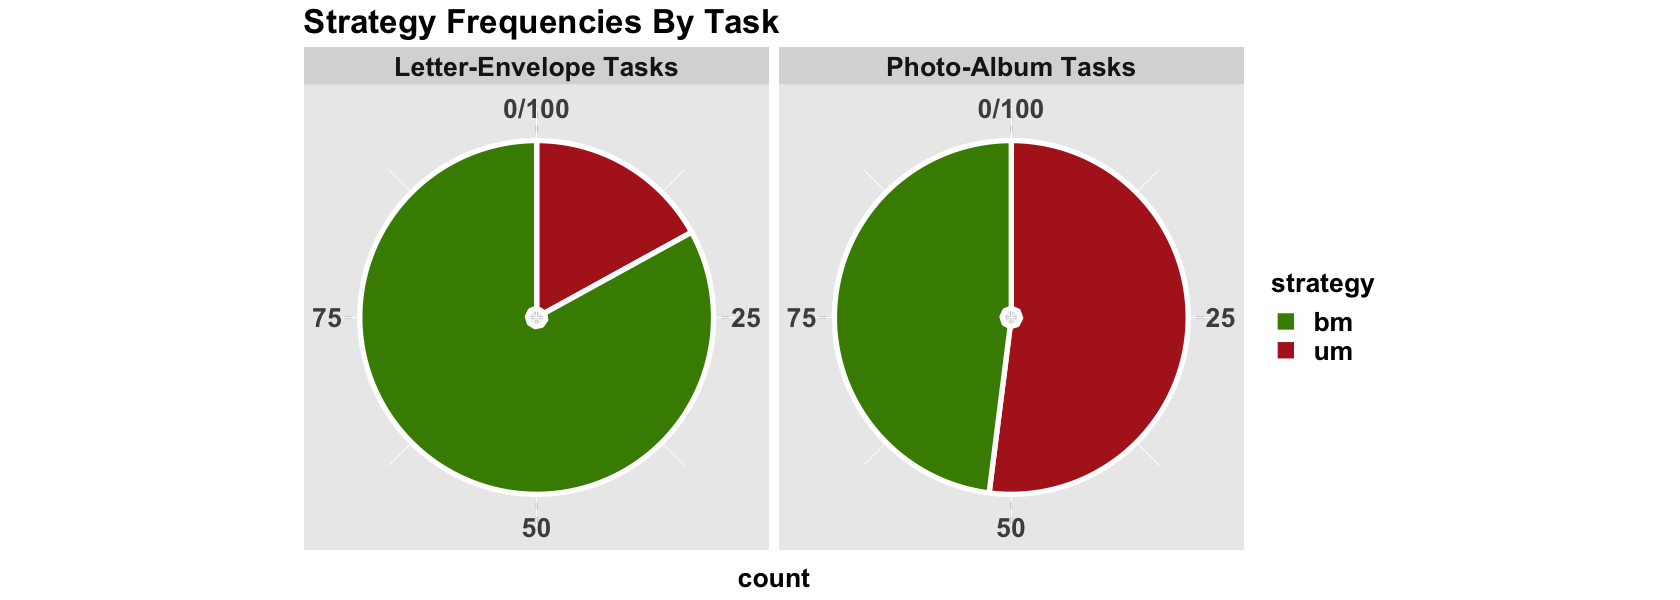

In [51]:
# tabulated summaries of strategy and movement times
as_hux(table(task.type,strategy),
       add_rownames = FALSE,
       add_colnames = FALSE)

# pie charts showing overall strategy frequencies by group
options(repr.plot.width=14, repr.plot.height=5)

ggplot(subset(aaut3,stroke=="stroke"), aes(x = "",fill = strategy)) +
geom_bar(width = 0) + coord_polar(theta = "y") + facet_grid(~task.type) + 
    scale_fill_manual(values = c("um" = "firebrick", "bm" = "chartreuse4")) + theme_cleveland() + 
    geom_bar(size = 1.5, colour = "white") + thm + ggtitle("Strategy Frequencies By Task")

### 1.2.d. Summary: Task by Group 


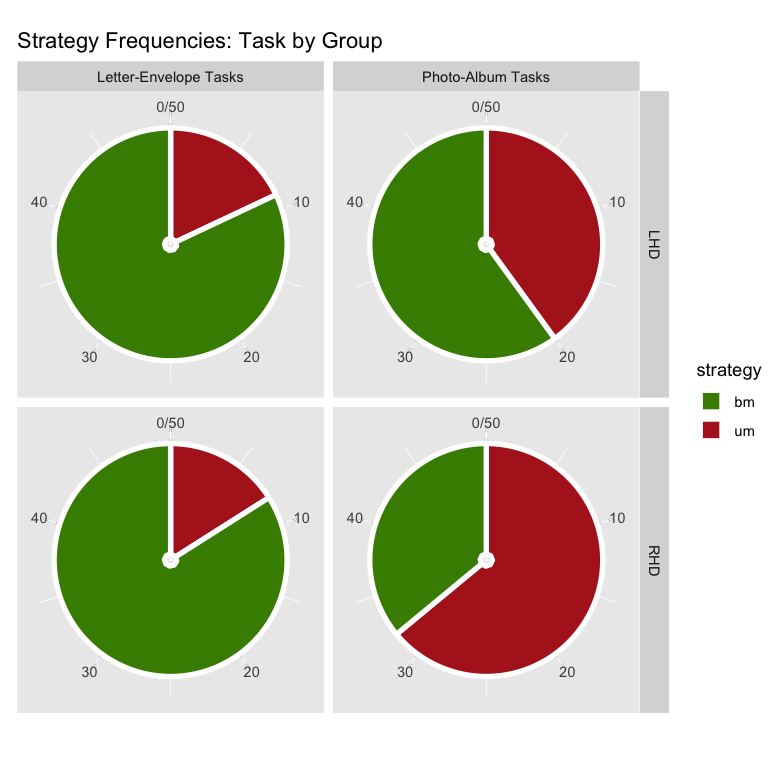

In [52]:
# pie charts showing overall strategy frequencies by group
options(repr.plot.width=6.5, repr.plot.height=6.5)

ggplot(aaut3, aes(x = "",fill = strategy)) +
geom_bar(width = 0) + coord_polar(theta = "y") + facet_grid(sol~task.type) + ylab("") + xlab("") + 
    scale_fill_manual(values = c("um" = "firebrick", "bm" = "chartreuse4")) + theme_cleveland() + 
    geom_bar(size = 1.5, colour = "white") + ggtitle("Strategy Frequencies: Task by Group")


*****
<a id='section3'></a>
# <font color = 'grey'> Step 2: Calculating Unadjusted Odds Ratio</font> 
Using 2x2 table of the proportion of LHD and RHD samples that use a bimanual or unimanual strategy, we compute the unadjusted odds of bimanual use in LHD compared to RHD using the equations below:<br> 
* $Odds\;Ratio\;(OR)_{Unadjusted}$ =  $\frac{a.d} {b.c} \;\;\;\;\; $ ... where $a =$ LHD-bm, $b =$ LHD-um, $c =$ RHD-bm, $d =$ RHD-um <br><br>
* $ SE $ = $ \sqrt{(1/a+1/b+1/c+1/d)}$ <br><br>
* $ 95 $% $ CI $ = $e^{log⁡(OR)\;±\; 1.96SE}$  <br><br>

* Note that the unadjusted odds ratio does not take into account UEFM scores or any other confounders.

In [53]:
t1 = table(aaut3$sol[task.type=="let"],aaut3$strategy[task.type=="let"])
t2 = table(aaut3$sol[task.type=="pat"],aaut3$strategy[task.type=="pat"])

# Odds Ratio Calculation for Letter-Envelope Tasks with LHD as reference group
aL = t1[2,1]; bL = t1[2,2]; cL = t1[3,1]; dL = t1[3,2] # 2 x 2 table
OR = (bL*cL)/(aL*dL);  # odds ratio
se.OR = sqrt(1/aL + 1/bL + 1/cL + 1/dL);  # se of OR
ciu.OR = exp(log(OR)+1.96*se.OR); # 95% CI of OR
cil.OR = exp(log(OR)-1.96*se.OR); 

display_markdown('**Unadjusted OR for Letter-Envelope Tasks** (note 95% CI crosses null value of 1)')
as_hux(data.frame(OR, se.OR, cil.OR, ciu.OR)) # tabulate

# Odds Ratio Calculation for Photo-Album Tasks with LHD as reference group
aP = t2[2,1]; bP = t2[2,2]; cP = t2[3,1]; dP = t2[3,2] # 2 x 2 table
OR = (bP*cP)/(aP*dP); # odds ratio
se.OR = sqrt(1/aP + 1/bP + 1/cP + 1/dP);  # se of OR
ciu.OR = exp(log(OR)+1.96*se.OR);  # 95% CI of OR
cil.OR = exp(log(OR)-1.96*se.OR); 

display_markdown('**Unadjusted OR for Photo-Album Tasks** (note 95% CI does NOT cross null value of 1)')
as_hux(data.frame(OR, se.OR, cil.OR, ciu.OR))

**Unadjusted OR for Letter-Envelope Tasks** (note 95% CI crosses null value of 1)

OR,se.OR,cil.OR,ciu.OR
1.152439,0.5332081,0.4052678,3.277131


**Unadjusted OR for Photo-Album Tasks** (note 95% CI does NOT cross null value of 1)

OR,se.OR,cil.OR,ciu.OR
0.375,0.412479,0.1670791,0.8416673


### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> We find that **not adjusting for any confounders, LHD are 1.63 ± 0.3 times more likely than RHD to use a bimanual strategy**. However, note that the confidence interval crosses the null value of 1, which means that the hypothesis that LHD are always more likely than RHD is not supported. In order to get a better estimate, we calcualate the adjusted odds ratios, i.e. after accounting for various other factors such as task and Fugl-Meyer score.

*****
<a id='section4'></a>
# <font color = 'grey'> Step 3: Primary analysis of *Strategy* (Logistic Regression)</font> 

<a id='section4a'></a>

## 1. Check Assumptions

### 1.1. Normality of Continuous Predictor Variables

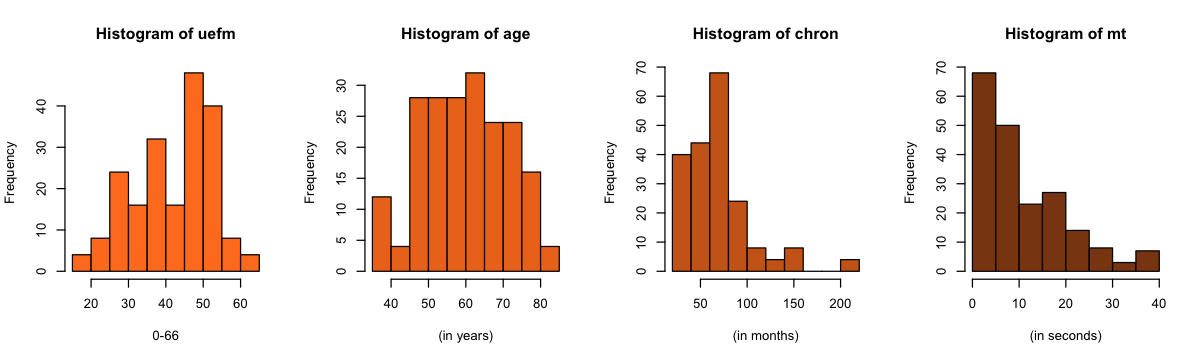

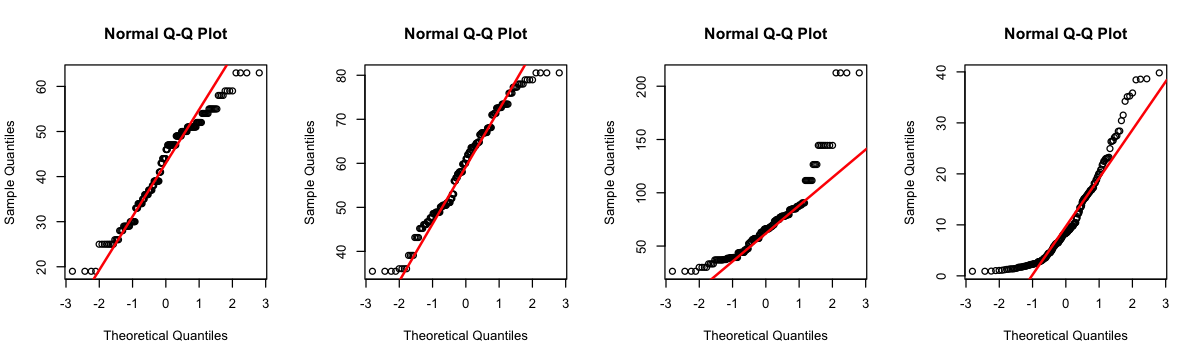

In [54]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,4))
    hist(uefm,xlab="0-66",col="chocolate1")
    hist(age,xlab="(in years)",col="chocolate2")
    hist(chron,xlab="(in months)",col="chocolate3")
    hist(mt,xlab="(in seconds)",col="chocolate4")
    qqnorm(uefm); qqline(uefm, col = "red", lwd = 2)
    qqnorm(age); qqline(age, col = "red", lwd = 2)
    qqnorm(chron); qqline(chron, col = "red", lwd = 2)
    qqnorm(mt); qqline(mt, col = "red", lwd = 2)

### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> **Fugl-Meyer and Age seem to be normally distributed**, whereas chronicity is positively skewed. We might consider transforming chronicity if this is a predictor of interest. For now, we are leaving it untranformed.

### 1.2. Collinearity between Continuous Predictor Variables

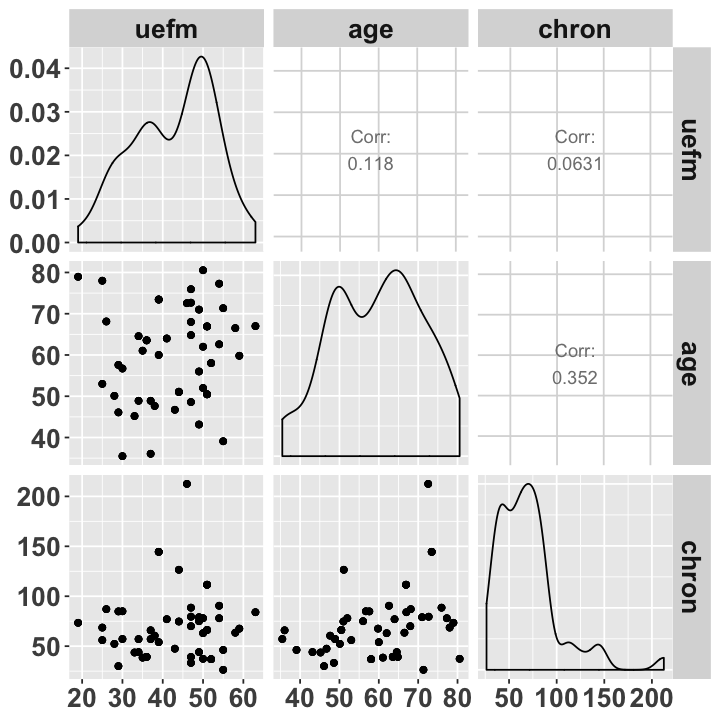

In [55]:
options(repr.plot.width=6, repr.plot.height=6)
ggpairs(aaut3[, c("uefm", "age", "chron")]) + thm

### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> **Age and chronicity seem to be positively correlated (r = 0.352).** This makes sense because the duration after stroke cannot really exceed/progress independently of age. That is, as individuals age, they also become more chronic.

### 1.3. Outliers and High Leverage Observations

,Subj,sex,stroke,sol,task.type,task,age,chron,uefm,Bimanual,strategy,cl.prefRole,predStrat.probs.
14,14,male,stroke,LHD,Letter-Envelope Tasks,le,78.96,73.41,19,1,bm,1,bm
34,36,male,stroke,RHD,Letter-Envelope Tasks,le,45.20,43.66,33,0,um,1,bm
142,14,male,stroke,LHD,Photo-Album Tasks,pa,78.96,73.41,19,0,um,NA,um
224,41,male,stroke,RHD,Photo-Album Tasks,pah,73.44,144.49,39,0,um,NA,um


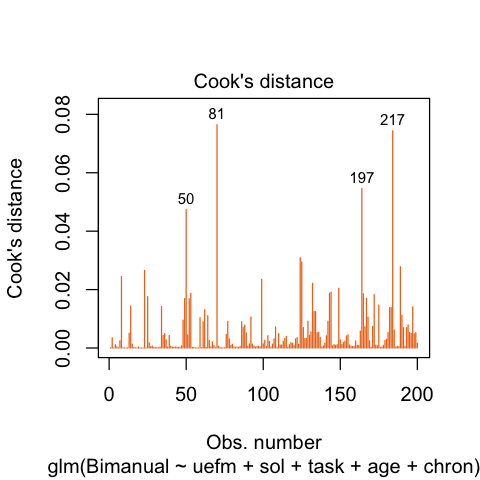

In [56]:
Model.checkOutlierLeverage <- glm(formula = Bimanual ~ uefm + sol + task + age + chron,family = binomial(link = logit),data = aaut3)
options(repr.plot.width=4, repr.plot.height=4)

plot(Model.checkOutlierLeverage, which = 4, id.n = 4,col="chocolate2")
probs = c(14,34,120,191)
predStrat = ifelse(Model.checkOutlierLeverage$fitted.value > 0.5, "bm", "um")
display(data.frame(aaut3[probs,-12],predStrat[probs]))

### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> We use a full GL model with all variables to diagnose outliers and/or high leverage points using Cook's Distance. Even though we have marked the 4 highest magnitude points here in the Cook's Distance plots, these values are not very high (highest = 0.08, which is still much smaller than large influencing values such as = 1). A general rule of thumb is that observations with a Cook’s D of more than 3 times the mean, $μ$, is a possible outlier. Subj #34 for example is very chronic (212 months).

In [57]:
modelVis.fn <- function(model){
    fm1F <- fortify.merMod(model)
    gg1 = ggplot(fm1F, aes(uefm,.fitted)) + geom_point(colour="orange",show.legend = FALSE) + 
          geom_smooth(method="lm",colour = "blue") + ggtitle("linearity assumption") + coord_cartesian(ylim=c(-4,6))
    
    ## note: Subjects are ordered by mean distance
    gg2 = ggplot(fm1F, aes(Subj,.scresid,group=Subj)) + geom_violin(col="lightseagreen",show.legend = FALSE) +
          scale_color_manual(values = c("um"="red", "bm"="darkgreen")) +
          geom_hline(yintercept=0, color="black", size=1,alpha=0.7) + ggtitle("std.resid. across UEFM")+ coord_cartesian(ylim=c(-10,6))
 
    gg3 = ggplot(fm1F, aes(uefm,.scresid)) + geom_point(colour="blue") + 
          geom_hline(yintercept=0,col="black")+geom_line(aes(group=Subj),alpha=0.4)+ ggtitle("std.resid. across Subjects")+ coord_cartesian(ylim=c(-10,6))
          geom_smooth(method="lm",colour = "orange")
    
    gg4 = ggplot(fm1F, aes(task,.scresid,group=task)) + geom_violin(col="lightseagreen",show.legend = FALSE) +
          scale_color_manual(values = c("um"="red", "bm"="darkgreen")) + ggtitle("std.resid. across Tasks") + coord_cartesian(ylim=c(-10,6))+
          geom_hline(yintercept=0, color="black", size=1,alpha=0.7)    
    
    options(repr.plot.width=12, repr.plot.height=3)
return(multiplot(gg1,gg3,gg2,gg4,cols=4)) 
       }


*****
<a id='section4b'></a>

## 2. Model Comparisons
The following model comparisons serve two purposes: <br>**2.1.** should an interaction term and does including Task meaningfully contribute to the overall model? <br>**2.2.** Should Task be included as a fixed effect or random effect nested within subject? <br>All model comparisons were done using dataset with all 200 observations in stroke survivors.

### 2.1. Should the model include Interactions and/or Task?
    1. logit (Strategy) ~ 1 + UEFM + (1|Subj)
    2. logit (Strategy) ~ 1 + UEFM + Side of Lesion + (1|Subj)
    3. logit (Strategy) ~ 1 + UEFM * Side of Lesion + (1|Subj)
    4. logit (Strategy) ~ 1 + UEFM + Side of Lesion + Task + (1|Subj) 
    5. logit (Strategy) ~ 1 + UEFM * Side of Lesion + Task + (1|Subj)
    6. logit (Strategy) ~ 1 + UEFM * Side of Lesion * Task + (1|Subj)
    

In [58]:
aaut3$c_uefm <- scale(aaut3$uefm,scale=TRUE,center=TRUE) #scale and center UEFM scores, i.e., z-scores
levels(aaut3$task) <- c("le","lef","pa","pah")

aModel0 <- suppressWarnings(glm(Bimanual ~ c_uefm,data = aaut3,family = binomial("logit")))
aModel1 <- suppressWarnings(glmer(Bimanual ~ c_uefm + (1|Subj),data = aaut3,family = binomial("logit")))
aModel2 <- suppressWarnings(glmer(Bimanual ~ c_uefm + sol + (1|Subj),data = aaut3,family = binomial("logit")))
aModel3 <- suppressWarnings(glmer(Bimanual ~ c_uefm * sol + (1|Subj),data = aaut3,family = binomial("logit")))
aModel4 <- suppressWarnings(glmer(Bimanual ~ c_uefm + sol + task + (1|Subj),data = aaut3,family = binomial("logit")))
aModel5 <- suppressWarnings(glmer(Bimanual ~ c_uefm * sol + task + (1|Subj),data = aaut3,family = binomial("logit")))
aModel6 <- suppressWarnings(glmer(Bimanual ~ c_uefm * sol * task + (1|Subj),data = aaut3,family = binomial("logit")))

suppressWarnings(huxreg('1: UEFM only' = aModel1,
       '2: UEFM + SoL' = aModel2,
       '3: UEFM x SoL' = aModel3,
       '4: UEFM + SoL + Task' = aModel4,
       '5: UEFM x SoL + Task' = aModel5,
       '6: UEFM x SoL x Task' = aModel6))

display_markdown('<br><br>**Likelihood Ratio Tests**')
anova(aModel1,aModel2,aModel3,aModel4,aModel5,aModel6)



names,1: UEFM only,2: UEFM + SoL,3: UEFM x SoL,4: UEFM + SoL + Task,5: UEFM x SoL + Task,6: UEFM x SoL x Task
,1: UEFM only,2: UEFM + SoL,3: UEFM x SoL,4: UEFM + SoL + Task,5: UEFM x SoL + Task,6: UEFM x SoL x Task
(Intercept),0.794601620813886 ***,1.24334338346542 ***,1.25103749914843 ***,3.38178440628686 ***,3.38181525277837 ***,2.98874251360236 **
,(0.00373936991575492),(0.303340474115196),(0.31189425116958),(0.727353309625634),(0.728746616071195),(1.07364088764233)
c_uefm,0.9228338314159 ***,0.985236053793935 ***,1.00173379281535 ***,1.38359927993925 ***,1.38385555254842 ***,1.06001261481967
,(0.00373949023587464),(0.206296232208478),(0.253527185437708),(0.314807027048126),(0.365628032637384),(0.750152271371205)
sd_(Intercept).Subj,0.620160091676363,0.506094016159458,0.504931004837983,1.13384511291861,1.13381307556502,1.1491236184087
,(NA),(NA),(NA),(NA),(NA),(NA)
solRHD,,-0.829964463143636 *,-0.837688283813846 *,-1.16471080721984 *,-1.1647622073759 *,1.45684217316481
,,(0.386398532996425),(0.392632960580165),(0.553325331349364),(0.555212574406252),(2.48368641609335)
c_uefm:solRHD,,,-0.0474935710676281,,-0.000826701365812184,4.0575158793957


<br><br>**Likelihood Ratio Tests**

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
aModel1,3,232.5984,242.4933,-113.29918,226.5984,NA,NA,NA
aModel2,4,229.7983,242.9916,-110.89915,221.7983,4.800043e+00,1,2.845902e-02
aModel3,5,231.7855,248.2771,-110.89274,221.7855,1.282600e-02,1,9.098308e-01
aModel4,7,195.1150,218.2032,-90.55748,181.1150,4.067052e+01,2,1.474040e-09
aModel5,8,197.1150,223.5015,-90.55748,181.1150,1.530733e-06,1,9.990128e-01
aModel6,17,200.6953,256.7666,-83.34763,166.6953,1.441971e+01,9,1.081591e-01


 ### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> 
       
   * Model 2 (UEFM + SoL) is better than Model 1 (UEFM alone) (LRT p = 0.02).
   
   * Model 3 (UEFM x SoL) is not better than Model 2 (UEFM + SoL) (LRT p = 0.9).
   
   * Model 4 (UEFM + SoL + Task) is better than Model 3 and Model 2 (no task) (LRT p < 0.0001).
   
   * Model 5 (UEFM x SoL + Task) similar to Model 4 (UEFM + SoL + Task) (LRT p = 0.9).
   
   * Model 6 (UEFM x SoL x Task) is not different from Model 5 (UEFM x SoL + Task) (LRT p = 0.1). <br><br>
   
   * **Model 4 or Model 5 seem to be reasonable as they take into account UEFM, SoL and Task.** <br>
  
   * **Even though slightly more complex (Df 8 vs 7), Model 5 might be better because it allows separate slopes for LHD and RHD.**


### 2.2. But both of the above models include Task as a fixed intercept; should Task be included as a fixed effect or random effect nested within subject?

<font color = 'black'> We did not have an a-priori hypothesis about task, so it does not make sense to include it as a fixed effect. If task is random, then it according to the design, each Subject was sampled 4 times and so we would  model *Task* has a random effect nested within *Subject*. 
    
       1. logit (Strategy) ~ 1 + UEFM : Side of Lesion + Task + (1|Subj)
       2. logit (Strategy) ~ 1 + UEFM + Side of Lesion + UEFM : Side of Lesion + (1|Subj/task)

Then our question would be restated as follows: <br>
### <font color = 'darkblue'> Is there an effect of hypothesized factors (impairment and side of lesion) on choice of strategy, after controlling for variation in Subjects, and Tasks within each Subject?


names,1: fixed task intercept,2: random task nested in Subj
,1: fixed task intercept,2: random task nested in Subj
(Intercept),3.38181525277837 ***,1.251047704304 ***
,(0.728746616071195),(0.311896106250626)
c_uefm,1.38385555254842 ***,1.00173908979568 ***
,(0.365628032637384),(0.25352819577341)
solRHD,-1.1647622073759 *,-0.83769532433172 *
,(0.555212574406252),(0.39263457143641)
tasklef,-0.626636281261806,
,(0.656449215330854),
taskpa,-2.6864651985506 ***,


<br><br>**Likelihood Ratio Tests**

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
bModel2,6,233.7855,253.5754,-110.89274,221.7855,NA,NA,NA
bModel1,8,197.1150,223.5015,-90.55748,181.1150,40.67052,2,1.474038e-09


<br><br>**Nested Random Model Estimates and P-Values**

term,estimate,std.error,statistic,p.value,group
(Intercept),1.2510477043,0.3118961,4.0111040,6.043549e-05,fixed
c_uefm,1.0017390898,0.2535282,3.9511940,7.776225e-05,fixed
solRHD,-0.8376953243,0.3926346,-2.1335241,3.288176e-02,fixed
c_uefm:solRHD,-0.0474898890,0.4187902,-0.1133978,9.097152e-01,fixed
sd_(Intercept).task:Subj,0.0006616194,NA,NA,NA,task:Subj
sd_(Intercept).Subj,0.5049361498,NA,NA,NA,Subj


<br><br>**Visualizing Adjusted Odds from Nested Model**

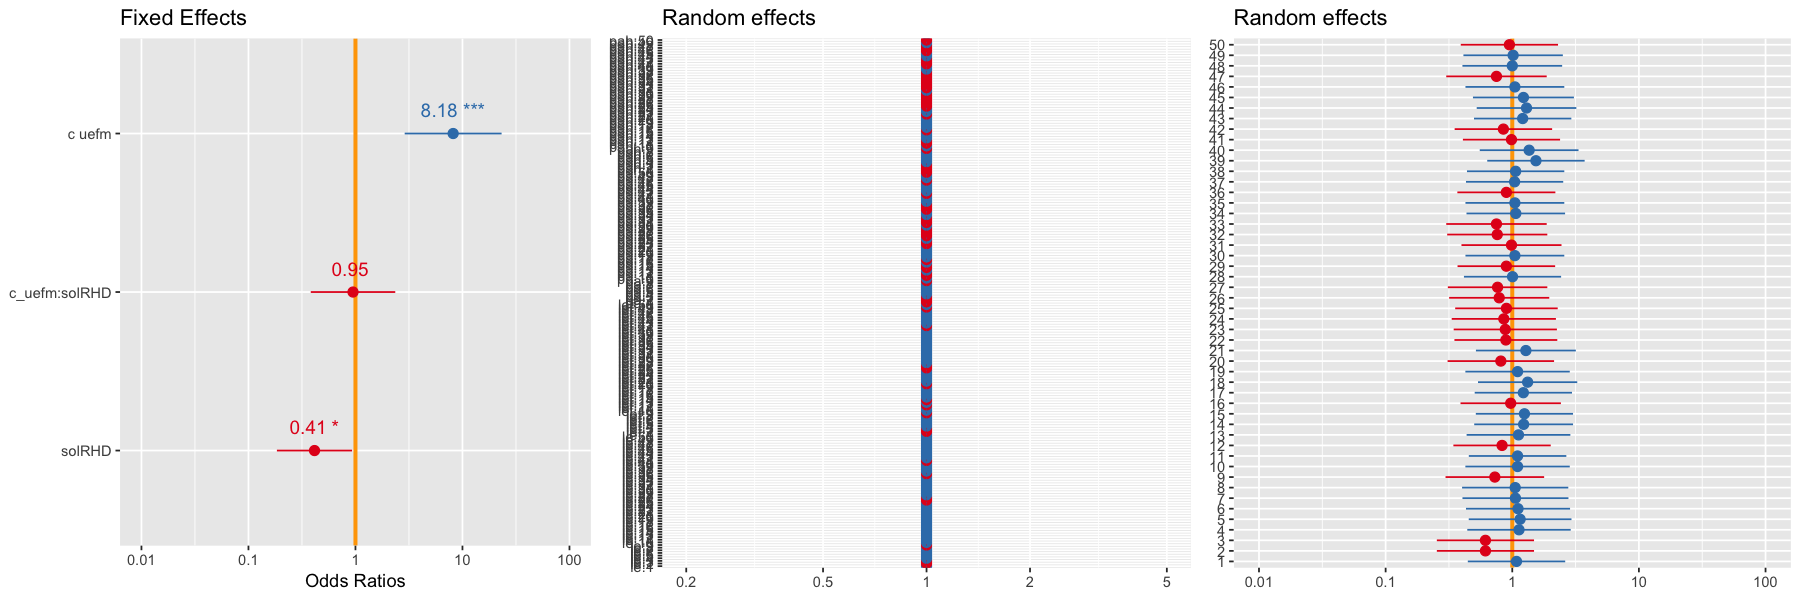

In [59]:
aaut3$c_uefm <- scale(aaut3$uefm,scale=TRUE,center=TRUE) #scale and center UEFM scores, i.e., z-scores
levels(aaut3$task) <- c("le","lef","pa","pah")

# Model 4 with task modeled as fixed intercept
bModel1 <- suppressWarnings(glmer(Bimanual ~ c_uefm * sol + task + (1|Subj),
                                  data = aaut3,family = binomial("logit")))

# Modifying Model 4 to model task as random effect nested within Subject 
bModel2 <- suppressWarnings(glmer(Bimanual ~ c_uefm * sol + (1|Subj/task),
                                  data = aaut3,family = binomial("logit")))


suppressWarnings(huxreg('1: fixed task intercept' = bModel1,
                        '2: random task nested in Subj' = bModel2))

display_markdown('<br><br>**Likelihood Ratio Tests**')
anova(bModel1,bModel2)

display_markdown('<br><br>**Nested Random Model Estimates and P-Values**')
suppressWarnings(tidy(bModel2))

display_markdown('<br><br>**Visualizing Adjusted Odds from Nested Model**')
gg4 = plot_model(bModel2,type="std2",vline.color = "orange",title = "Fixed Effects",show.values = TRUE)
gg5 = plot_model(bModel2,type="re",vline.color = "orange")
options(repr.plot.width=15, repr.plot.height=5)
multiplot(gg4,gg5[[1]],gg5[[2]],cols=3)

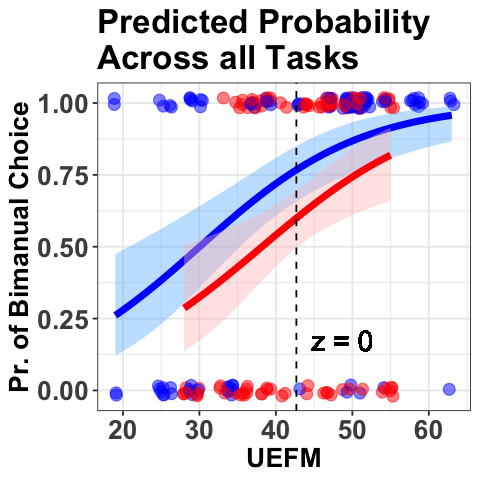

In [60]:
options(repr.plot.width=4, repr.plot.height=4)

Fig1a = ggplot(aaut3, aes(x = uefm, y = Bimanual,color=sol)) +
        geom_jitter(size=3, alpha=0.5,height = 0.02, show.legend = FALSE) + 
        geom_smooth(method="glm",aes(fill=as.factor(sol)), size = 2,method.args = list(family = "binomial"),show.legend = FALSE) + 
        
        geom_vline(xintercept = mean(uefm),linetype = "dashed") + 
        geom_text(size=6,aes(mean(uefm)+6,0.175,label = 'z = 0'),col="black",show.legend = FALSE) + 
        scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + 
        scale_fill_manual(values=c('steelblue1','rosybrown1')) + theme_bw() + 
        
        xlab("UEFM") + ylab("Pr. of Bimanual Choice") + ggtitle("Predicted Probability \nAcross all Tasks") + thm

Fig1a


### 2.3. Model Diagnostics for Model with Task as Fixed Effect and as Random Effect Nested within Subjects

<br><br>**Task as Fixed Effect**

sigma,logLik,AIC,BIC,deviance,df.residual
1,-90.55748,197.115,223.5015,136.942,192


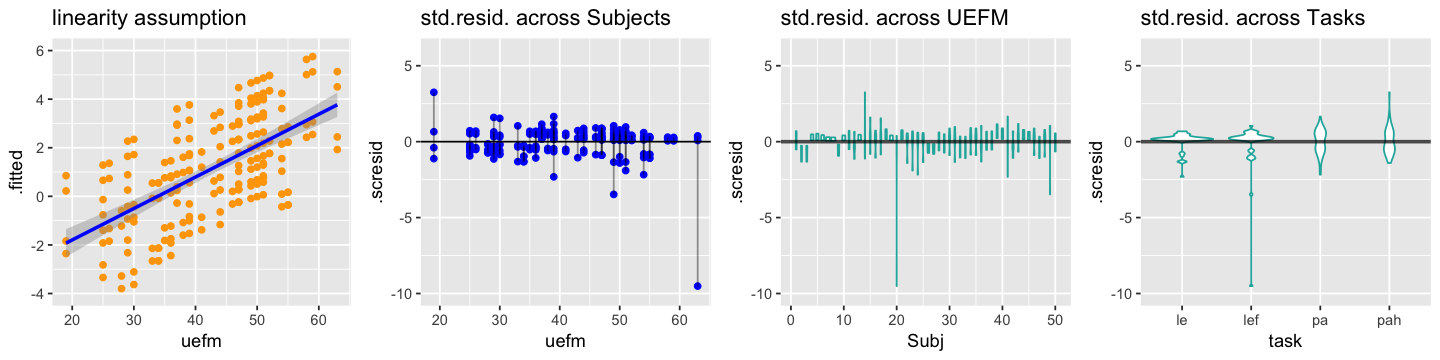

In [61]:
display_markdown('<br><br>**Task as Fixed Effect**')
glance(aModel5)
modelVis.fn(aModel5)

<br><br>**Task as Random Nested Effect**

sigma,logLik,AIC,BIC,deviance,df.residual
1,-110.8927,233.7855,253.5754,205.6317,194


<br><br>**Task as Random Nested Effect**

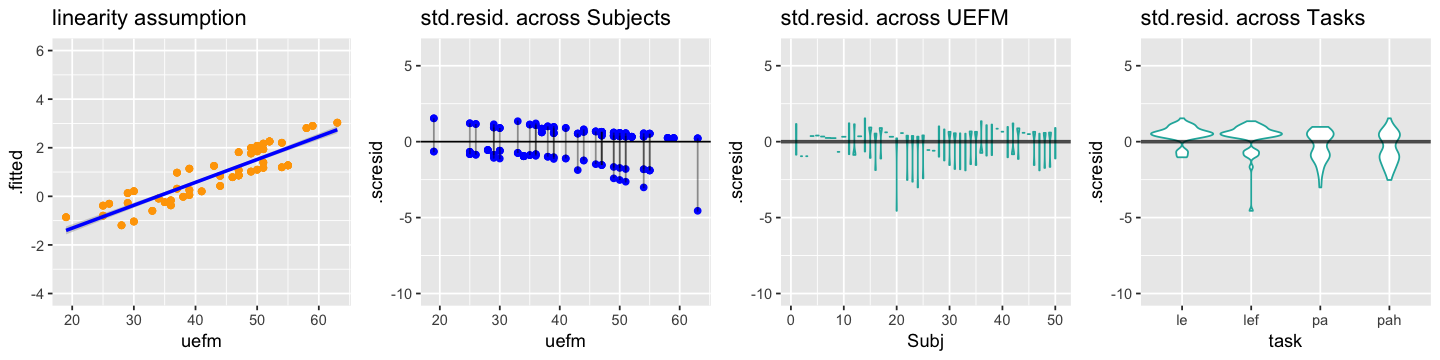

In [62]:
display_markdown('<br><br>**Task as Random Nested Effect**')
glance(bModel2)
display_markdown('<br><br>**Task as Random Nested Effect**')
modelVis.fn(bModel2)

  ### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> 

   
   * We find that this modified Model 4b (ie, with random effects of task nested within Subject) is a different from the original Model 4 where task is modeled as fixed intercept (LRT, p < 0.0001)
   * Additionally, this nested model is simpler (Df = 5) compared to Model 4 (Df = 7). 
   * Coefficients for our fixed effects (UEFM and SoL), even though still significant, are weakened in this model, however. <br>
   * Taken together, a more complex model where *Task* is modeled as fixed effects may be better at explainaing the variance in strategy. However, because there were no a-priori hypothesis about task-wise effects, it is not intuitive to model it as a fixed effect. Therefore, **the simpler nested mixed-effects model may be more appropriate.**

<a id='section4c'></a>

## 3. Model Performance

In [63]:
boot.fn <- function(fit) {
    return(fixef(fit))
}

### Bootstrapping Model Estimates

term,statistic,bias,std.error,conf.low,conf.high
(Intercept),1.25104770,-0.01811628,0.2868170,0.5959729,1.77314023
c_uefm,1.00173909,-0.06036489,0.2555743,0.4068368,1.46413398
solRHD,-0.83769532,0.02868577,0.4073059,-1.8069139,0.01011205
c_uefm:solRHD,-0.04748989,0.05467383,0.4436536,-0.9024779,0.79532227


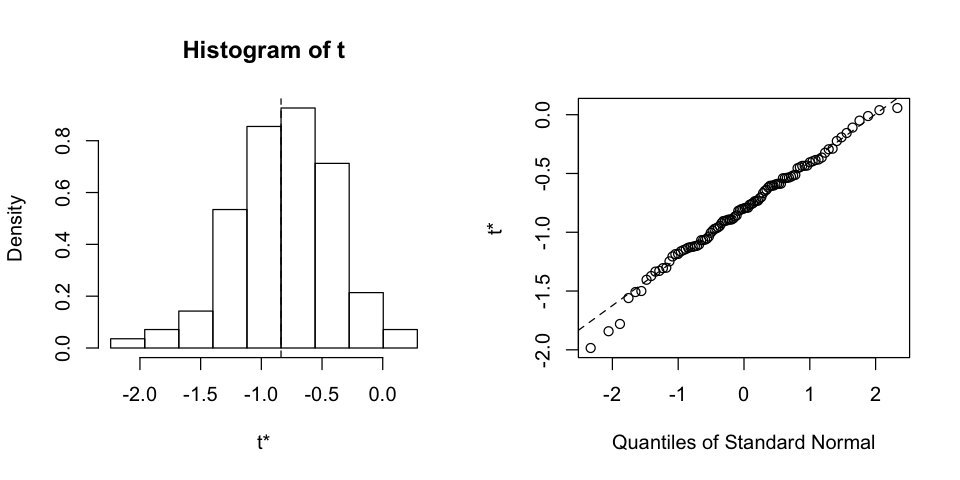

In [64]:
set.seed(7)
boot.result = bootMer(bModel2, boot.fn, nsim = 100)
tidy(boot.result,conf.int = TRUE)

options(repr.plot.width=8, repr.plot.height=4)
plot(boot.result,index=3)

### Split-Data Validation & Accuracy

In [65]:
# Confusion matrix
Model.Meas <- function(confMatrix){
  accuracy = round(((confMatrix[1] + confMatrix[4])/sum(confMatrix))*100,digits=2)
  sensit = round((confMatrix[4]/(confMatrix[4] + confMatrix[3]))*100,digits=2)
  specif = round((confMatrix[1]/(confMatrix[2] + confMatrix[1]))*100,digits=2)
  return(data.frame(accuracy,sensit,specif))
}

In [66]:
display_markdown("**Training Set Accuracy**")
set.seed(7) # set seed for pseudo random sampling
test=sample(200,50) # psuedo randomly sample 50 data points values ranging from 1:200 (these will be indexes)
pr = ifelse(predict(bModel2,type="resp",aaut3)[-test]<0.5,'pred_um','pred_bm')
confMatrix = table(strategy[-test],pr)
as_hux(confMatrix,add_rownames=FALSE,add_colnames=FALSE)
Model.Meas(confMatrix) # total sum of all rows and columns = 150 (training set remaining after 50 test set points removed)

**Training Set Accuracy**

,pred_bm,pred_um
bm,91,10
um,19,30


accuracy,sensit,specif
80.67,75,82.73


In [67]:
display_markdown("**Test Set Accuracy**")
pr = ifelse(predict(bModel2,type="resp",aaut3)[test]<0.5,'pred_um','pred_bm')
confMatrix = table(strategy[test],pr)
as_hux(confMatrix,add_rownames = FALSE,add_colnames=FALSE)
Model.Meas(confMatrix) # total sum of all rows and columns = 50 (only 50 points from test set)

**Test Set Accuracy**

,pred_bm,pred_um
bm,25,5
um,9,11


accuracy,sensit,specif
72,68.75,73.53


<a id='section4d'></a>
## 4. Post-Hoc Task-Wise Comparisons
* As seen in the pie charts previously, there were systematic differences in the proportion of bimanual choices such that the two letter-envelope tasks—folding the letter (80%) and inserting the letter into the envelope (86%)—were nearly twice as likely to elicit a bimanual choice in stroke survivors compared to the two photo-album tasks—receiving album (44%) and inserting photo in album sleeve (52%). <br><br>
* Therefore, to systematically explore these differences, we separated out the letter-envelope task pair from the two photo-album task pair and running the same GLMER as before:

In [68]:
# renaming levels of the tasks to their abbreviated form
levels(aaut3$task) <- c("le","lef","pa","pah")
aaut3$c_uefm <- scale(aaut3$uefm,scale=TRUE,center=TRUE) #scale and center UEFM scores, i.e., z-scores

# FILTER out ONLY Photo-Album Task Pair (note !=)
aaut3  %>% 
filter(task!=c("le")) %>% 
filter(task!=c("lef")) %>% 

{. ->> aaut4 }     # assign to new dataframe

# Run Nested Mixed Model for Photo-Album Task Pair
bModel5 <- suppressMessages(glmer(Bimanual ~ c_uefm * sol + (1|Subj/task),data = aaut4,family = binomial("logit")))


# FILTER out ONLY Letter-Envelope Task Pair (note !=)
aaut3  %>% 
filter(task!=c("pa")) %>% 
filter(task!=c("pah")) %>% 
{. ->> aaut5 }

# Run Nested Mixed Model for Letter-Envelope Task Pair
dModel5 <- suppressMessages(glmer(Bimanual ~ c_uefm * sol + (1|Subj/task),data = aaut5,family = binomial("logit")))

suppressWarnings(huxreg('Letter-Envelope Tasks' = dModel5,'Photo-Album Tasks'= bModel5))


names,Letter-Envelope Tasks,Photo-Album Tasks
,Letter-Envelope Tasks,Photo-Album Tasks
(Intercept),13.5686406683005 ***,0.685891568684942
,(2.89149303355797),(0.428820404514295)
c_uefm,0.654355166834937,1.36047447161312 **
,(1.90580447297247),(0.428029437323583)
solRHD,29.2207752530288 **,-1.44143317156917 *
,(11.155406230331),(0.611165938855872)
c_uefm:solRHD,42.6698608558938 ***,-0.497764779934809
,(11.4974301100929),(0.638481809075172)
sd_(Intercept).task:Subj,71.8200479409754,0.000133603931730031


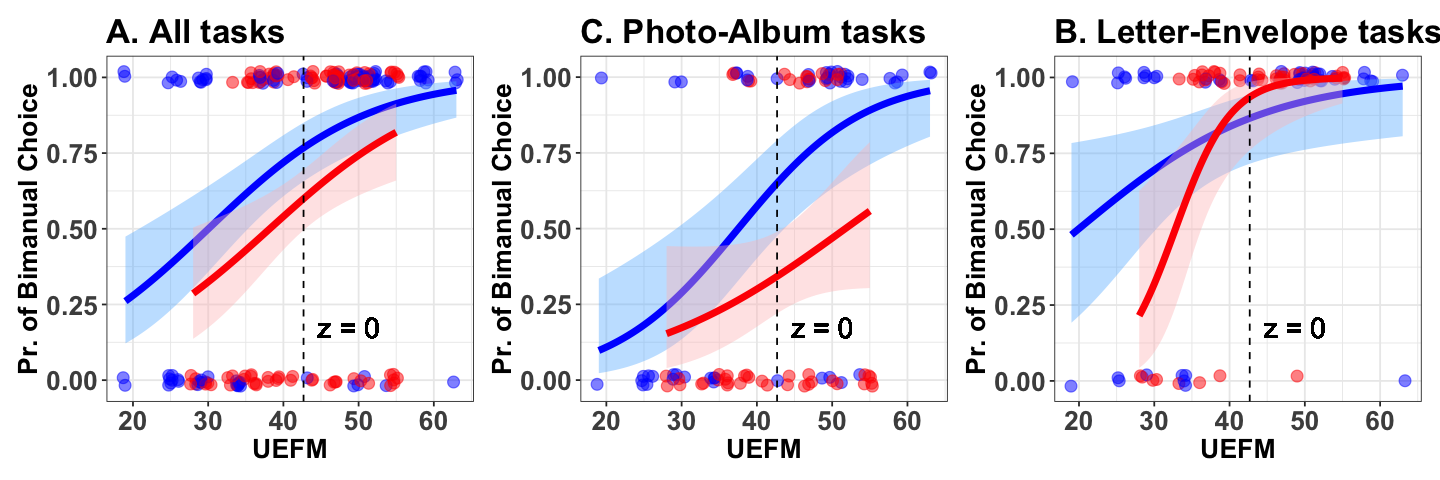

In [69]:
# Across Tasks and Task-wise figures -- For Manuscript

Fig1a = ggplot(aaut3, aes(x = uefm, y = Bimanual,color=sol)) +
        geom_jitter(size=3, alpha=0.5,height = 0.02, show.legend = FALSE) + 
        geom_smooth(method="glm",aes(fill=as.factor(sol)), size = 2,method.args = list(family = "binomial"),show.legend = FALSE) + 
        
        geom_vline(xintercept = mean(uefm),linetype = "dashed") + 
        geom_text(size=6,aes(mean(uefm)+6,0.175,label = 'z = 0'),col="black",show.legend = FALSE) + 
        scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + 
        scale_fill_manual(values=c('steelblue1','rosybrown1')) + theme_bw() + 
        
        xlab("UEFM") + ylab("Pr. of Bimanual Choice") + ggtitle("A. All tasks") + thm


Fig4a = ggplot(aaut4, aes(x = uefm, y = Bimanual,color=sol)) +
        geom_jitter(size=3, alpha=0.5,height = 0.02, show.legend = FALSE) + 
        geom_smooth(method="glm",aes(fill=as.factor(sol)), size = 2,method.args = list(family = "binomial"),show.legend = FALSE) + 
        
        geom_vline(xintercept = mean(uefm),linetype = "dashed") + 
        geom_text(size=6,aes(mean(uefm)+6,0.175,label = 'z = 0'),col="black",show.legend = FALSE) + 
        scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + theme_bw() + 
        scale_fill_manual(values=c('steelblue1','rosybrown1')) +
        
        xlab("UEFM") + ylab("Pr. of Bimanual Choice") + ggtitle("C. Photo-Album tasks") + thm


Fig4b = ggplot(aaut5, aes(x = uefm, y = Bimanual,color=sol)) +
        geom_jitter(size=3, alpha=0.5,height = 0.02, show.legend = FALSE) + 
        geom_smooth(method="glm",aes(fill=as.factor(sol)), size = 2,method.args = list(family = "binomial"),show.legend = FALSE) + 
        
        geom_vline(xintercept = mean(uefm),linetype = "dashed") + 
        geom_text(size=6,aes(mean(uefm)+6,0.175,label = 'z = 0'),col="black",show.legend = FALSE) + 
        scale_color_manual(values = c("LHD" = "blue", "RHD" = "red")) + theme_bw() + 
        scale_fill_manual(values=c('steelblue1','rosybrown1')) +
        
        xlab("UEFM") + ylab("Pr. of Bimanual Choice") + ggtitle("B. Letter-Envelope tasks") + thm


options(repr.plot.width=12, repr.plot.height=4); #multiplot(Fig1a,Fig4b,Fig4a,cols=3)

gnew = Fig1a+Fig4a+Fig4b

#tiff("gnew.tiff", units="in", width=12, height=4, res=500); gnew; dev.off(); 
gnew

 ### <font color = 'orangered'> Interim Summary </font> 
<font color = 'teal'> 
* Above nested model(ie, bimanual ~ UEFM * SoL + (1 | Subj / task) reveals that there is a **strong interaction effect between UEFM and Side of Lesion for the two letter-envelope tasks**, such that the UEFM slope is much steeper for the RHD group compared to the LHD group. <br>
* There is also a significant difference between the groups in the intercept but in the opposite direction from that of the photo-album tasks, ie, those with RHD have a higher likelihood of using both hands together. 

****
<a id='section5'></a>
# <font color = 'grey'> Step 4: Secondary analysis of *Movement time* (Linear Regression) </font>

        log (Movt time) ~ 1 + Strategy + Side of Lesion + UEFM + (1|Subj)

In [70]:
eModel5 <- suppressMessages(lmer(log(mt)~ Bimanual + sol + c_uefm + (1|Subj),data = aaut4))

suppressWarnings(tidy(eModel5))


term,estimate,std.error,statistic,group
(Intercept),1.1892366,0.17468567,6.8078654,fixed
Bimanual,0.2389483,0.20150838,1.1857985,fixed
solRHD,0.1077990,0.18326649,0.5882091,fixed
c_uefm,-0.1153046,0.09808008,-1.1756169,fixed
sd_(Intercept).Subj,0.0000000,NA,NA,Subj
sd_Observation.Residual,0.8770776,NA,NA,Residual


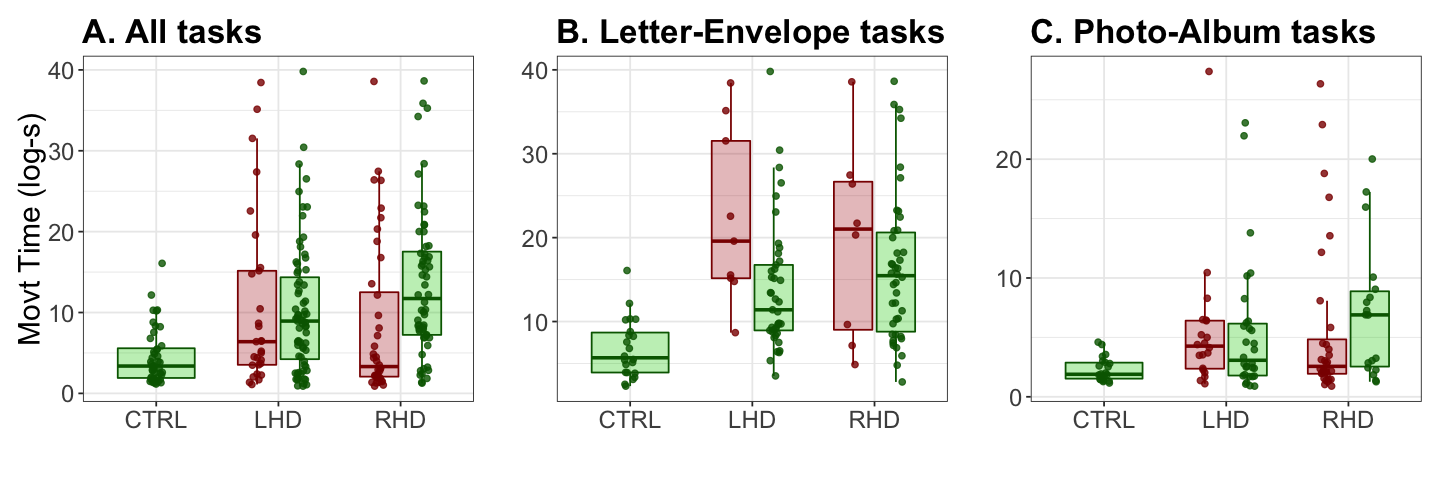

In [71]:

aaut2  %>% 
filter(task!=c("le")) %>% 
filter(task!=c("lef")) %>% 
{. ->> aaut4b }

# PA and PAH tasks (Model b from above)
bModel5 <- suppressMessages(glmer(Bimanual ~ c_uefm * sol + (1|Subj/task),data = aaut4,family = binomial("logit")))


aaut2  %>% 
filter(task!=c("pa")) %>% 
filter(task!=c("pah")) %>% 
{. ->> aaut5b }


gg1 = ggplot(aes(y = mt, x = sol,col=reorder(strategy,Bimanual),fill=reorder(strategy,Bimanual)), 
                 data = aaut2)  + 
    geom_boxplot(alpha=0.3, width = 0.7,show.legend = FALSE,outlier.colour = NA) + xlab("") + 
    ylab("Movt Time (log-s)")+ #coord_cartesian(ylim = c(0, 45)) +
    geom_jitter(alpha = 0.8,position = position_jitterdodge(0.2),show.legend = FALSE) +
    scale_color_manual(values = c("um" = "darkred", "bm" = "darkgreen")) +
    scale_fill_manual(values=c("um" = "firebrick", "bm" = "green3")) + ggtitle("A. All tasks") + 
        theme_bw() + theme(text = element_text(size=18),plot.title = element_text(size = 20, face = "bold")) + 
    scale_x_discrete(labels=c("lhd" = "LHD", "rhd" = "RHD", "ctr" = "CTRL")) + 
    theme(text = element_text(size=18))


gg2 = ggplot(aes(y = mt, x = sol,col=reorder(strategy,Bimanual),fill=reorder(strategy,Bimanual)), 
                 data = aaut5b)  + 
    geom_boxplot(alpha=0.3, width = 0.7,show.legend = FALSE,outlier.colour = NA) + 
    xlab("") + ylab("")+
    geom_jitter(alpha = 0.8,position = position_jitterdodge(0.2),show.legend = FALSE) +
    scale_color_manual(values = c("um" = "darkred", "bm" = "darkgreen")) +
    scale_fill_manual(values=c("um" = "firebrick", "bm" = "green3"))+ ggtitle("B. Letter-Envelope tasks") + 
    theme_bw() + theme(text = element_text(size=18),plot.title = element_text(size = 20, face = "bold")) + 
    scale_x_discrete(labels=c("lhd" = "LHD", "rhd" = "RHD", "ctr" = "CTRL")) + 
    theme(text = element_text(size=18))


gg3 = ggplot(aes(y = mt, x = sol,col=reorder(strategy,Bimanual),fill=reorder(strategy,Bimanual)), 
                 data = aaut4b)  + 
    geom_boxplot(alpha=0.3, width = 0.7,show.legend = FALSE,outlier.colour = NA) + xlab("") + 
    ylab("")+ #coord_cartesian(ylim = c(0, 45)) +
    geom_jitter(alpha = 0.8,position = position_jitterdodge(0.2),show.legend = FALSE) +
    scale_color_manual(values = c("um" = "darkred", "bm" = "darkgreen")) +
    scale_fill_manual(values=c("um" = "firebrick", "bm" = "green3")) + ggtitle("C. Photo-Album tasks") + 
        theme_bw() + theme(text = element_text(size=18),plot.title = element_text(size = 20, face = "bold")) + 
    scale_x_discrete(labels=c("lhd" = "LHD", "rhd" = "RHD", "ctr" = "CTRL")) + 
    theme(text = element_text(size=18))

options(repr.plot.width=12, repr.plot.height=4); #multiplot(gg1,gg2,gg3,cols=3); 
gnew2 = gg1+gg2+gg3

# tiff("gnew2.tiff", units="in", width=12, height=4, res=500); gnew2; dev.off(); 
gnew2


## Resources:
1.	https://online.stat.psu.edu/stat504/node/159/
2.	https://stats.idre.ucla.edu/stata/seminars/deciphering-interactions-in-logistic-regression/
3. http://www.sthda.com/english/articles/36-classification-methods-essentials/148-logistic-regression-assumptions-and-diagnostics-in-r/

## Revision-1 (071120)

,strategy,mt,cl.prefRole
X,bm:142,Min. : 1.067,no :12
X.1,um: 0,1st Qu.: 6.021,yes :76
X.2,NA,Median : 9.495,NA's:54
X.3,NA,Mean :11.750,NA
X.4,NA,3rd Qu.:16.066,NA
X.5,NA,Max. :39.806,NA


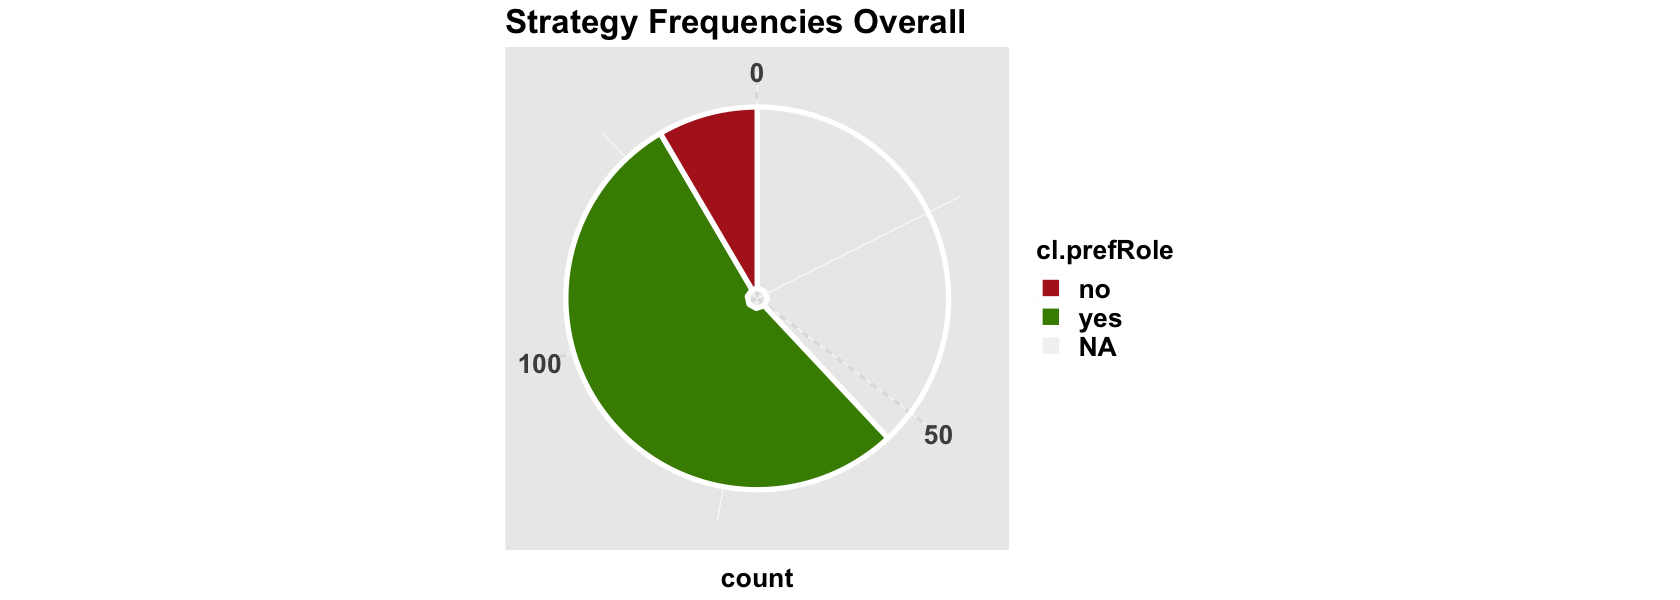

In [59]:
aaut2  %>% 
filter (strategy=="bm")  %>% 
filter(task!="pah")  %>% 
{. ->> aaut_cl }

# tabulated summaries of strategy and movement times
as_hux(summary(aaut_cl[,11:13]),add_rownames =  FALSE,add_colnames = FALSE)


# pie charts showing overall strategy frequencies by group
options(repr.plot.width=14, repr.plot.height=5)

ggplot(aaut_cl, aes(x = "",fill = cl.prefRole)) +
geom_bar(width = 0) + coord_polar(theta = "y") +
    scale_fill_manual(values = c("no" = "firebrick", "yes" = "chartreuse4")) + theme_cleveland() + 
    geom_bar(size = 1.5, colour = "white") + thm + ggtitle("Strategy Frequencies Overall")

In [46]:
dim(aaut2)[1]/4*3 #total subjects for 3 tasks 
                  #(because PAH does not have clear preferences 
                  #adds up to freq total above 90 + 93 = 183)

[1] 183